<a href="https://colab.research.google.com/github/CA683-Group99/Wind-Energy-Prediction/blob/main/4_IslandElectricityRandomForestModel_transformedTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESULTS PER OPTION:

- Latest:

      'hour', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
      'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 
      'temp_DUB', 'radianTimeSin', 'radianTimeCos', 'TotalWindCapacityMW'
Eirgrid Wind Forecast Week MAE: 465.4 - RMSE: 672.9 - r2_score: 0.611

 RF Week MAE: 166.3 - RF Week RMSE: 247.1 - RF Week Train r2_score: 0.948

- Original 4_IslandElectricityRandomForestModel:

      'hour', 'isweekday', 'month', 'wdsp_BEL', 'wddir_BEL', 'temp_BEL',
       'wdsp', 'wddir', 'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB',
       'temp_DUB', 'TotalWindCapacityMW'],


MAE: 272.26593735961364
RMSE: 360.6494999475853
Train r2_score: 0.8544186552101587

- radianTime instead of Month and Hour X_train.columns:
      'isweekday', 'wdsp_BEL', 'wddir_BEL', 'temp_BEL', 'wdsp', 'wddir',
      'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
      'radianTime', 'Day_inYear', 'TotalWindCapacityMW'

MAE: 292.7106431098383
RMSE: 381.47832078345976
Test r2_score: 0.8371173664337087

- With Day_inYear and hour:
      ['hour', 'isweekday', 'wdsp_BEL', 'wddir_BEL', 'temp_BEL', 'wdsp',
       'wddir', 'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'Day_inYear', 'TotalWindCapacityMW']
MAE: 272.65383788185085
RMSE: 358.0680549323199
Test r2_score: 0.8564952711814031


- Wind transformed option: 
      'date', 'hour', 'isweekday', 'wdsp_BELx', 'wdsp_BELy', 'temp_BEL',
       'wdspx', 'wdspy', 'wdsp_CORx', 'wdsp_CORy', 'wdsp_DUBx', 'wdsp_DUBy',
       'temp_DUB', 'Day_inYear', 'TotalWindCapacityMW', 'ActualWindMW',
       'ForecastWndMW', 'ActualDemandMW',
       
RF Week MAE: 265.3
RF Week RMSE: 328.0
RF Week Train r2_score: 0.9202757692338636


In [458]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')


from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

import os

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Load feature vector


In [459]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [460]:
import os
os.chdir('/content/drive/MyDrive/CA683Project')
!ls "Data/"

 IrelandWeatherData.csv
 IslandElectricity2017_2020v3.csv
 IslandElectricity2017_2020v4.csv
'WindInstalledCapacities_MW_Monthly - Sheet1.csv'


In [461]:
fileP = 'Data/IslandElectricity2017_2020v4.csv'
newdf = pd.read_csv(fileP, parse_dates=[1], na_values=" ")

latestWindCapacityMW = newdf['TotalWindCapacityMW'].max()

In [462]:
latestWindCapacityMW

5531.095

In [463]:
#Krystian: Looking for maximal extreme values
print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.describe()

-----------DATA SIZE -------------
(32136, 77)
Rows:  32136 , Columns:  77
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           32136 non-null  int64         
 1   date                 32136 non-null  datetime64[ns]
 2   rain_BEL             32136 non-null  float64       
 3   temp_BEL             32136 non-null  float64       
 4   wetb_BEL             32136 non-null  float64       
 5   dewpt_BEL            32136 non-null  float64       
 6   vappr_BEL            32136 non-null  float64       
 7   rhum_BEL             32136 non-null  int64         
 8   msl_BEL              32136 non-null  float64       
 9   wdsp_BEL             32136 non-null  int64         
 10  wddir_BEL            32136 non-null  int64         
 11  rain_DUB             32136 non-null

Unnamed: 0      rain_BEL  ...          year  TotalWindCapacityMW
count  32136.000000  32136.000000  ...  32136.000000         32136.000000
mean   16067.500000      0.164712  ...   2018.814040          5009.629385
std     9277.008462      0.517029  ...      1.112341           446.423214
min        0.000000      0.000000  ...   2017.000000          4096.494000
25%     8033.750000      0.000000  ...   2018.000000          4608.520000
50%    16067.500000      0.000000  ...   2019.000000          5006.080000
75%    24101.250000      0.100000  ...   2020.000000          5497.495000
max    32135.000000     10.200000  ...   2021.000000          5531.095000

[8 rows x 75 columns]

In [464]:
newdf[newdf.wdsp_DUB.isnull()== True]

Empty DataFrame
Columns: [Unnamed: 0, date, rain_BEL, temp_BEL, wetb_BEL, dewpt_BEL, vappr_BEL, rhum_BEL, msl_BEL, wdsp_BEL, wddir_BEL, rain_DUB, temp_DUB, wetb_DUB, dewpt_DUB, vappr_DUB, rhum_DUB, msl_DUB, wdsp_DUB, wddir_DUB, ww_DUB, w_DUB, sun_DUB, vis_DUB, clht_DUB, clamt_DUB, rain, temp, wetb, dewpt, vappr, rhum, msl, wdsp, wddir, ww, w, sun, vis, clht, clamt, rain_COR, temp_COR, wetb_COR, dewpt_COR, vappr_COR, rhum_COR, msl_COR, wdsp_COR, wddir_COR, ww_COR, w_COR, sun_COR, vis_COR, clht_COR, clamt_COR, rain_MAL, temp_MAL, wetb_MAL, dewpt_MAL, vappr_MAL, rhum_MAL, msl_MAL, wdsp_MAL, wddir_MAL, Unnamed: 0.1, ActualDemandMW, ForecastWndMW, ActualWindMW, ActualGenerationMW, NetTotal_MW, WindMWPercent, hour, isweekday, month, year, TotalWindCapacityMW]
Index: []

In [465]:
import plotly.express as px

fig = px.scatter(newdf, x='date', y='ActualDemandMW')
fig.show()

In [466]:
eirgridCols = ['ActualDemandMW', 'ActualGenerationMW' , 'ForecastWndMW' , 'ActualWindMW', 'NetTotal_MW' ]
len(eirgridCols)

5

In [467]:
#newdf = newdf.loc[newdf['month'].isnull() == False]

In [468]:
newdf['WindGenPercent'] = (newdf['ActualWindMW'] / newdf['ActualGenerationMW']) * 100
fig = px.scatter(newdf, x='hour', y='WindGenPercent', facet_col='year')
fig.show()

In [469]:
inData = newdf
inData.isweekday = inData.isweekday.astype('bool')

## Transform wind speed and dir

In [470]:
newdf.date

0       2017-07-01 00:00:00
1       2017-07-01 01:00:00
2       2017-07-01 02:00:00
3       2017-07-01 03:00:00
4       2017-07-01 04:00:00
                ...        
32131   2021-02-28 19:00:00
32132   2021-02-28 20:00:00
32133   2021-02-28 21:00:00
32134   2021-02-28 22:00:00
32135   2021-02-28 23:00:00
Name: date, Length: 32136, dtype: datetime64[ns]

In [471]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))

recentdf = newdf[newdf.date > "2021-02-24"]
fig.add_trace(go.Scatter(x=recentdf['date'], y=recentdf.wdsp,
                    mode='lines',
                    name='Wind Speed (kn)',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=recentdf['date'], y=recentdf.wddir,
                    mode='lines',
                    name='Wind dir (degree)',showlegend=True), 1, 1, secondary_y=True)

fig.show()

In [472]:
import math

suffixes = ['_COR', '_DUB', '_BEL', '', '_MAL']
def transformWindInto2d(df):
  for suf in suffixes:
    df['wind' + suf + 'sin'] = None
    df['wind' + suf + 'cos'] = None

  def transformWindInto2dRow(row):
    for suf in suffixes:
      row['wind' + suf + 'sin'] = row['wdsp'+ suf] * math.sin(row['wddir' + suf])
      row['wind' + suf + 'cos'] = row['wdsp'+ suf] * math.cos(row['wddir' + suf])
    return row

  df = df.apply(transformWindInto2dRow, axis='columns')
  return df

inData = transformWindInto2d(inData)
inData.columns

Index(['Unnamed: 0', 'date', 'rain_BEL', 'temp_BEL', 'wetb_BEL', 'dewpt_BEL',
       'vappr_BEL', 'rhum_BEL', 'msl_BEL', 'wdsp_BEL', 'wddir_BEL', 'rain_DUB',
       'temp_DUB', 'wetb_DUB', 'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB',
       'wdsp_DUB', 'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB', 'vis_DUB',
       'clht_DUB', 'clamt_DUB', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht',
       'clamt', 'rain_COR', 'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR',
       'rhum_COR', 'msl_COR', 'wdsp_COR', 'wddir_COR', 'ww_COR', 'w_COR',
       'sun_COR', 'vis_COR', 'clht_COR', 'clamt_COR', 'rain_MAL', 'temp_MAL',
       'wetb_MAL', 'dewpt_MAL', 'vappr_MAL', 'rhum_MAL', 'msl_MAL', 'wdsp_MAL',
       'wddir_MAL', 'Unnamed: 0.1', 'ActualDemandMW', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'WindMWPercent',
       'hour', 'isweekday', 'month', 'year', 'TotalWindCapacityMW',
       'WindGenPe

In [473]:
inData[['wind_CORsin', 'wind_CORcos']].describe()

wind_CORsin   wind_CORcos
count  32136.000000  32136.000000
mean      -0.794188     -0.857943
std        7.716163      8.010704
min      -33.991699    -41.952060
25%       -5.823168     -6.304172
50%       -1.712622     -0.265159
75%        4.552175      4.499431
max       34.308388     32.870811

In [474]:

recentdf = inData[inData.date > "2021-02-24"]

fig = px.scatter(x=inData['wind_CORsin'], y=inData.wind_CORcos)
#fig = px.scatter(x=recentdf['windsin'], y=recentdf.windcos)
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

(-46.585344938006656, 44.1101232770581, -40.275433395669715, 44.82383268922747)

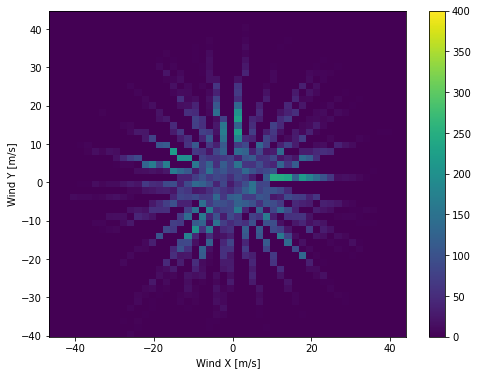

In [475]:
plt.hist2d(inData['wind_MALsin'], inData['wind_MALcos'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

## Transform time into 2D

Intend to capture the seasonal pattern

In [476]:
def old_transformTimeInto2d(df):
  timestamp_s = df.date.map(datetime.timestamp)
  day = 24*60*60
  year = (365.2425)*day

  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
  df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
  df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

  return df

In [477]:
import numpy as np
import math

def transformTimeInto2d(df):
  df['Day_inYear'] = None
  df['daysInYear'] = None
  df['radianTime'] = None
  df['radianTimeCos'] = None
  df['radianTimeSin'] = None
  df['hourCos'] = None  # newly added radian
  df['hourSin'] = None

  def check_leap(year):
    if year%4 == 0:
      return 366
    else:
      return 365

  def transformTimeInto2dRow(row):
    row['Day_inYear'] = row['date'].timetuple().tm_yday
    daysInYear = check_leap(row['year'])
    row['daysInYear'] = daysInYear
    row['radianTime'] = (row.hour + row.Day_inYear * 24 ) / (24 * daysInYear) * (2*np.pi)
    row['radianTimeCos'] = math.cos(row['radianTime'])
    row['radianTimeSin'] = math.sin(row['radianTime'])
    row['hourCos'] = math.cos(row.hour/24 * (2*np.pi))
    row['hourSin'] = math.sin(row.hour/24 * (2*np.pi))
    return row

  df = df.apply(transformTimeInto2dRow, axis='columns')
  return df

inData = transformTimeInto2d(inData)
inData.columns

Index(['Unnamed: 0', 'date', 'rain_BEL', 'temp_BEL', 'wetb_BEL', 'dewpt_BEL',
       'vappr_BEL', 'rhum_BEL', 'msl_BEL', 'wdsp_BEL', 'wddir_BEL', 'rain_DUB',
       'temp_DUB', 'wetb_DUB', 'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB',
       'wdsp_DUB', 'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB', 'vis_DUB',
       'clht_DUB', 'clamt_DUB', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht',
       'clamt', 'rain_COR', 'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR',
       'rhum_COR', 'msl_COR', 'wdsp_COR', 'wddir_COR', 'ww_COR', 'w_COR',
       'sun_COR', 'vis_COR', 'clht_COR', 'clamt_COR', 'rain_MAL', 'temp_MAL',
       'wetb_MAL', 'dewpt_MAL', 'vappr_MAL', 'rhum_MAL', 'msl_MAL', 'wdsp_MAL',
       'wddir_MAL', 'Unnamed: 0.1', 'ActualDemandMW', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'WindMWPercent',
       'hour', 'isweekday', 'month', 'year', 'TotalWindCapacityMW',
       'WindGenPe

Text(0.5, 1.0, 'Radian time signal')

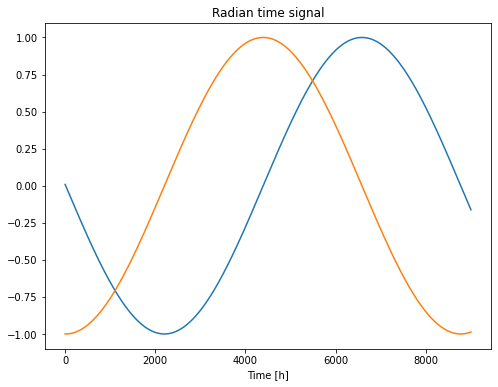

In [478]:
plt.plot(np.array(inData['radianTimeSin'])[:(24*375)])
plt.plot(np.array(inData['radianTimeCos'])[:(24*375)])
plt.xlabel('Time [h]')
plt.title('Radian time signal')

# Prep smaller dataset to run model : reduced dataset for prototype to known important factors

In [479]:
#OLD
#redds = newdf.loc[:, ['date', 'Year sin', 'Year cos',  'Day sin', 'Day cos', 'isweekday',
#                     'wdsp_BELx', 'wdsp_BELy', 'temp_BEL',
#                      'wdspx', 'wdspy','temp',
#                      'wdsp_CORx', 'wdsp_CORy', 'temp_COR',
#                      'wdsp_DUBx', 'wdsp_DUBy', 'temp_DUB', 
#                      'TotalWindCapacityMW', 'ActualWindMW', 'ForecastWndMW', 'ActualDemandMW']]

In [480]:
attrs = ['date', 'hour', 'month', 'year', 'Day_inYear',
          'wdsp_BEL', 'wddir_BEL', 'wind_BELsin', 'wind_BELcos','vappr_BEL', 'rhum_BEL', 'temp_BEL',
          'wdsp', 'wddir', 'windsin', 'windcos', 'vappr', 'rhum', 'temp', 'msl',
          'wdsp_COR', 'wddir_COR', 'wind_CORsin', 'wind_CORcos', 'vappr_COR', 'rhum_COR', 'temp_COR',
          'wdsp_DUB', 'wddir_DUB', 'wind_DUBsin', 'wind_DUBcos', 'vappr_DUB', 'rhum_DUB', 'temp_DUB',
          'wdsp_MAL', 'wddir_MAL', 'wind_MALsin', 'wind_MALcos', 'vappr_MAL', 'rhum_MAL', 'temp_MAL',
          'TotalWindCapacityMW',
          'radianTimeSin', 'radianTimeCos', 'hourSin', 'hourCos',
          'ActualWindMW', 'ActualDemandMW', 'ForecastWndMW']

dataSet = inData.loc[(inData.year>=2017) & (inData.date < "2021-03-01"), attrs]

## Handle the rows with empty values

In [481]:
# CL Change : No missing data :=)
dataSet.isnull().sum()

date                   0
hour                   0
month                  0
year                   0
Day_inYear             0
wdsp_BEL               0
wddir_BEL              0
wind_BELsin            0
wind_BELcos            0
vappr_BEL              0
rhum_BEL               0
temp_BEL               0
wdsp                   0
wddir                  0
windsin                0
windcos                0
vappr                  0
rhum                   0
temp                   0
msl                    0
wdsp_COR               0
wddir_COR              0
wind_CORsin            0
wind_CORcos            0
vappr_COR              0
rhum_COR               0
temp_COR               0
wdsp_DUB               0
wddir_DUB              0
wind_DUBsin            0
wind_DUBcos            0
vappr_DUB              0
rhum_DUB               0
temp_DUB               0
wdsp_MAL               0
wddir_MAL              0
wind_MALsin            0
wind_MALcos            0
vappr_MAL              0
rhum_MAL               0


In [482]:
#dataSet.fillna(method='ffill', inplace=True)

In [483]:
# Remove the rows with empty cells
import numpy as np
eIdx = np.where(pd.isnull(dataSet))
print(eIdx[0])

print(dataSet.shape)
dataSet = dataSet.drop(eIdx[0], axis=0)
print(dataSet.shape)

[]
(32136, 49)
(32136, 49)


## Different feature sets to build different ANN models

In [484]:
# CL: 2021/04/02: remove Hour as very highly correlated with Day_inYear, as well as temp other than temp_DUB
# and add 'msl' Sea Level pressure as highly predictive of upcoming storm and improve wind turbine performance
# KP: added 'hourSin', 'hourCos'
attr_basic = ['hour', 'Day_inYear',
              'wdsp_BEL', 'wddir_BEL', 
              'wdsp', 'wddir', 'msl',
              'wdsp_COR', 'wddir_COR',
              'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
              'wdsp_MAL', 'wddir_MAL',
              'TotalWindCapacityMW']

attr_rhum = ['hour', 'Day_inYear',
              'wdsp_BEL', 'wddir_BEL', 'rhum', 
              'wdsp', 'wddir', 'rhum', 'msl',
              'wdsp_COR', 'wddir_COR', 'rhum_COR',
              'wdsp_DUB', 'wddir_DUB', 'rhum_DUB', 'temp_DUB',
              'wdsp_MAL', 'wddir_MAL',
              'TotalWindCapacityMW']

attr_vappr = ['hour', 'Day_inYear',
              'wdsp_BEL', 'wddir_BEL', 'vappr_BEL', 
              'wdsp', 'wddir', 'vappr','msl', 'msl',
              'wdsp_COR', 'wddir_COR', 'vappr_COR',
              'wdsp_DUB', 'wddir_DUB', 'vappr_DUB', 'temp_DUB',
              'wdsp_MAL', 'wddir_MAL',
              'TotalWindCapacityMW']

attr_rhum_vappr = ['hour', 'Day_inYear',
                    'wdsp_BEL', 'wddir_BEL', 'rhum', 'vappr_BEL', 
                    'wdsp', 'wddir', 'rhum', 'vappr', 'msl',
                    'wdsp_COR', 'wddir_COR', 'rhum_COR', 'vappr_COR',
                    'wdsp_DUB', 'wddir_DUB', 'rhum_DUB', 'vappr_DUB', 'temp_DUB',
                    'wdsp_MAL', 'wddir_MAL',
                    'TotalWindCapacityMW']

attr_2D_wind = ['hour', 'Day_inYear',
                'wind_BELsin', 'wind_BELcos', 
                'windsin', 'windcos', 'msl',
                'wind_CORsin', 'wind_CORcos',
                'wind_DUBsin', 'wind_DUBcos', 'temp_DUB',
                'wind_MALsin', 'wind_MALcos',
                'TotalWindCapacityMW']

attr_radianTime = ['wdsp_BEL', 'wddir_BEL', 
                    'wdsp', 'wddir', 'msl',
                    'wdsp_COR', 'wddir_COR',
                    'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
                    'wdsp_MAL', 'wddir_MAL',
                    'radianTimeSin', 'radianTimeCos', 'hourSin', 'hourCos',
                    'TotalWindCapacityMW']

attr_2D_wind_time = ['wind_BELsin', 'wind_BELcos', 
                      'windsin', 'windcos', 'msl',
                      'wind_CORsin', 'wind_CORcos', 
                      'wind_DUBsin', 'wind_DUBcos', 'temp_DUB', 
                      'wind_MALsin', 'wind_MALcos',
                      'radianTimeSin', 'radianTimeCos', 'hourSin', 'hourCos',
                      'TotalWindCapacityMW']

attr_selections = [attr_basic, attr_rhum, attr_vappr, attr_msl, attr_rhum_vappr, attr_rhum_msl, attr_2D_wind, attr_radianTime, attr_2D_wind_time, attr_rhum_time]
attrSet_names = ['basic', 'rhum', 'vappr', 'msl', 'rhum & vappr', 'rhum & msl', 'wind', 'radianTime', 'wind & time', 'time & rhum']



## Correlation matrix and VIF


### Basic subset

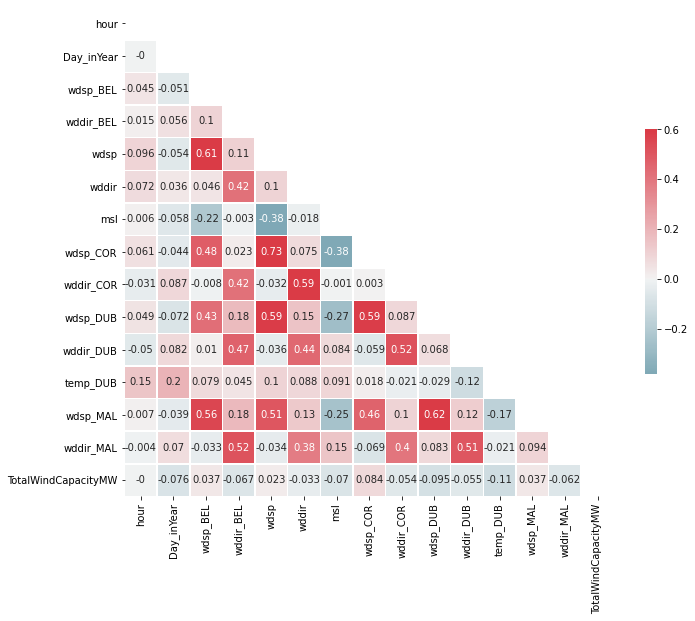

In [485]:
import seaborn as sns

num_df = dataSet.loc[:, attr_basic].select_dtypes(['int', 'float'])
# Compute the correlation matrix
corr = num_df.corr()
corr = np.round(corr, 3)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, center=0, annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [486]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

num_df = add_constant(num_df)

vif = [variance_inflation_factor(num_df.to_numpy(), i) for i in range(num_df.to_numpy().shape[1])]

pd.DataFrame(num_df.iloc[:, 1:].columns, vif[1:])

0
1.040994                 hour
1.096399           Day_inYear
1.902767             wdsp_BEL
1.636887            wddir_BEL
2.970795                 wdsp
1.762910                wddir
1.288898                  msl
2.466372             wdsp_COR
1.863341            wddir_COR
2.213779             wdsp_DUB
1.763845            wddir_DUB
1.267681             temp_DUB
2.168078             wdsp_MAL
1.641695            wddir_MAL
1.073116  TotalWindCapacityMW

### RadianTime subset

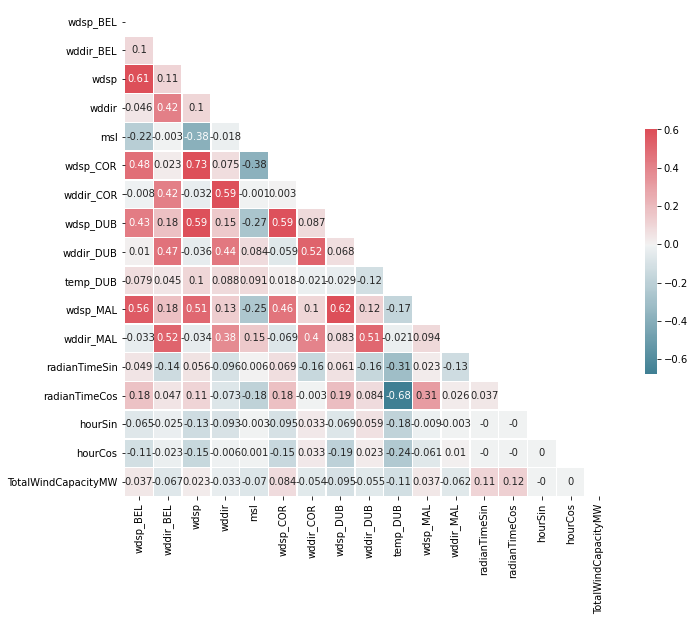

In [487]:
num_df = dataSet.loc[:, attr_radianTime].select_dtypes(['int', 'float'])
# Compute the correlation matrix
corr = num_df.corr()
corr = np.round(corr, 3)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, center=0, annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [488]:
num_df = add_constant(num_df)

vif = [variance_inflation_factor(num_df.to_numpy(), i) for i in range(num_df.to_numpy().shape[1])]

pd.DataFrame(num_df.iloc[:, 1:].columns, vif[1:])

0
1.983110             wdsp_BEL
1.650642            wddir_BEL
2.984325                 wdsp
1.780276                wddir
1.287881                  msl
2.492101             wdsp_COR
1.877142            wddir_COR
2.265639             wdsp_DUB
1.787195            wddir_DUB
3.146683             temp_DUB
2.190807             wdsp_MAL
1.642021            wddir_MAL
1.363146        radianTimeSin
2.582610        radianTimeCos
1.118998              hourSin
1.195042              hourCos
1.081679  TotalWindCapacityMW

### attr_2D_wind_time subset

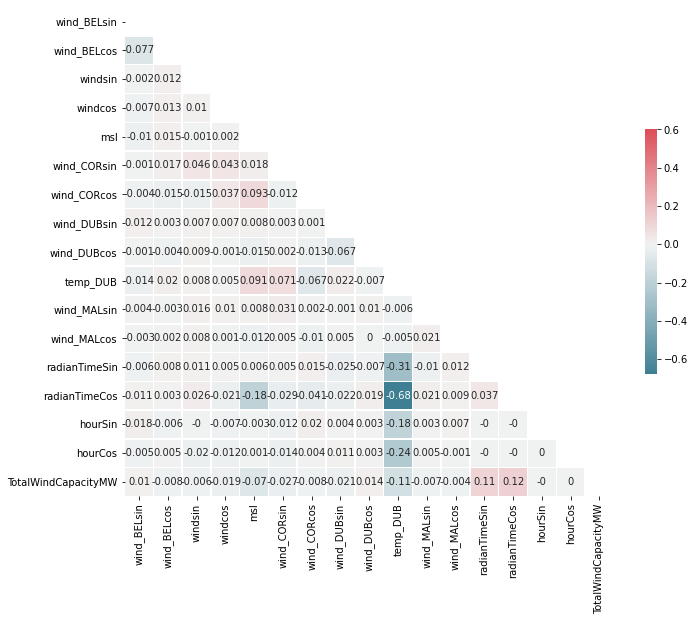

In [489]:

num_df = dataSet.loc[:, attr_2D_wind_time].select_dtypes(['int', 'float'])
# Compute the correlation matrix
corr = num_df.corr()
corr = np.round(corr, 3)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, center=0, annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [490]:
num_df = add_constant(num_df)

vif = [variance_inflation_factor(num_df.to_numpy(), i) for i in range(num_df.to_numpy().shape[1])]

pd.DataFrame(num_df.iloc[:, 1:].columns, vif[1:])

0
1.006881          wind_BELsin
1.008641          wind_BELcos
1.005262              windsin
1.004866              windcos
1.048549                  msl
1.012979          wind_CORsin
1.030887          wind_CORcos
1.006374          wind_DUBsin
1.005617          wind_DUBcos
2.782586             temp_DUB
1.002745          wind_MALsin
1.001122          wind_MALcos
1.238317        radianTimeSin
2.315848        radianTimeCos
1.090713              hourSin
1.160168              hourCos
1.031121  TotalWindCapacityMW

# Training, Validation & Test set

In [491]:
dataSet.shape

(32136, 49)

In [492]:
from sklearn.model_selection import train_test_split
import numpy as np

splitOption = 1

testSet = dataSet.loc[(inData.date > "2021-02-14"), :]
mainSet = dataSet.loc[(inData.date <= "2021-02-14"), :]

if (splitOption == 0):
  trainSet, validSet = train_test_split(mainSet, test_size=0.2, random_state=42)
elif (splitOption == 1):  # split per day of the month
  dataSet["dayInMonth"] = 0

  def setDayInMonth(row):
      row["dayInMonth"] = row.date.day
      return row

  dataSet = dataSet.apply(setDayInMonth, axis=1)

  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= "2021-02-22"), :]
elif (splitOption == 2):  # split per period
  trainSet = dataSet.loc[(inData.date <= "2020-02-22"), :]
  validSet = dataSet.loc[(inData.date > "2020-02-22"), :]  
else:
  monthYear = []
  for y in range(2017,2021):
    for m in range(1,13):
     monthYear.append([m, y])
  trainDate, validDate = train_test_split(monthYear, test_size=0.2, random_state=42)

  trainDate = np.array(trainDate)
  validDate = np.array(validDate)

  trainSet = dataSet.loc[(dataSet.month in trainDate[:,0]) & (dataSet.year in trainDate[:,1]), :]
  validSet = dataSet.loc[(dataSet.month in validDate[:,0]) & (dataSet.year in validDate[:,1]), :]

y_train = trainSet.ActualWindMW
y_valid = validSet.ActualWindMW
y_test = testSet.ActualWindMW

In [493]:
trainSet.shape, validSet.shape, testSet.shape

((23232, 50), (8760, 50), (359, 49))

# run Random Forest For RadianTime subset

In [494]:
attrSet_names

['basic',
 'rhum',
 'vappr',
 'msl',
 'rhum & vappr',
 'rhum & msl',
 'wind',
 'radianTime',
 'wind & time',
 'time & rhum']

In [537]:
attrSet = attr_basic

In [538]:
from sklearn.model_selection import train_test_split

X_train_full = trainSet.loc[:, attrSet]
X_valid_full = validSet.loc[:, attrSet]
X_test_full = testSet.loc[:, attrSet]


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64', 'bool']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [539]:
X_train_full.shape, X_valid_full.shape

((23232, 15), (8760, 15))

In [540]:
y_train.shape , X_train.shape, y_valid.shape, X_valid.shape

((23232,), (23232, 15), (8760,), (8760, 15))

In [541]:
X_train.columns

Index(['hour', 'Day_inYear', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
       'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'wdsp_MAL', 'wddir_MAL', 'TotalWindCapacityMW'],
      dtype='object')

## Run model with Performance metrics :  mean_absolute_error, mean_squared_error, r2_score

In [542]:
#from sklearn.metrics import mean_absolute_percentage_error

In [543]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=200, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])



In [544]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [545]:
# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))
#print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_valid, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_valid, preds))) 
print('Test r2_score:', r2_score(y_valid, preds))

MAE: 252.6239940068493
RMSE: 330.9852386907417
Test r2_score: 0.8760633487747794


In [546]:
validLen = y_valid.shape[0]
preds.shape[0], y_valid.shape[0]

(8760, 8760)

In [547]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))

fig.add_trace(go.Scatter(x=dataSet['date'], y=dataSet['ForecastWndMW'],
                    mode='lines',
                    name='Eirgrid Forecast Wnd',showlegend=True), 1, 1, secondary_y=False)

#fig.add_trace(go.Scatter(x=dataSet['date'], y=dataSet['ActualDemandMW'],
#                    mode='lines',
#                    name='Demand Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=dataSet['date'], y=dataSet['ActualWindMW'],
                    mode='lines',
                    name='Wind Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=validSet['date'], y=preds,
                    mode='lines',
                    name='Pred',showlegend=True), 1, 1, secondary_y=False)


fig.update_layout(
    title_text="Wind actual (blue) vs. Predictions (red) for days 22nd and above each month",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=4000,
    height=500
)
fig.show()

## Metrics for last 2 weeks (Test set)

In [548]:
X_test_full.columns

Index(['hour', 'Day_inYear', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
       'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'wdsp_MAL', 'wddir_MAL', 'TotalWindCapacityMW'],
      dtype='object')

In [549]:
X_train.columns

Index(['hour', 'Day_inYear', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
       'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'wdsp_MAL', 'wddir_MAL', 'TotalWindCapacityMW'],
      dtype='object')

In [550]:
# Preprocessing of validation data, get predictions
test_preds = clf.predict(X_test_full)

print('MAE:', mean_absolute_error(y_test, test_preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_preds))) 
print('Test r2_score:', r2_score(y_test, test_preds))

MAE: 151.6800417827298
RMSE: 216.32126361552616
Test r2_score: 0.959825564521981


In [551]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))

fig.add_trace(go.Scatter(x=testSet['date'], y=testSet['ForecastWndMW'],
                    mode='lines',
                    name='Eirgrid Forecast Wnd',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=testSet['date'], y=testSet['ActualDemandMW'],
                    mode='lines',
                    name='Eirgrid Actual Demand',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=testSet['date'], y=testSet['ActualWindMW'],
                    mode='lines',
                    name='Wind Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=testSet['date'], y=test_preds,
                    mode='lines',
                    name='Pred',showlegend=True), 1, 1, secondary_y=False)


fig.update_layout(
    title_text="Wind actual (blue) vs. Predictions (red) for last 2 weeks (test set)",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=1000,
    height=800
)
fig.show()

In [552]:
print('Eirgrid Wind Forecast Week MAE:', np.round(mean_absolute_error(testSet.ActualWindMW, testSet.ForecastWndMW ),1))
print('Eirgrid Wind Forecast Week RMSE:', np.round(np.sqrt(mean_squared_error(testSet.ActualWindMW, testSet.ForecastWndMW)), 1)) 
print('Eirgrid Wind Forecast Week Train r2_score:', r2_score(testSet.ActualWindMW, testSet.ForecastWndMW))
print("---------------------")
print('RF Week MAE:', np.round(mean_absolute_error(testSet.ActualWindMW, test_preds ), 1))
print('RF Week RMSE:', np.round(np.sqrt(mean_squared_error(testSet.ActualWindMW, test_preds)), 1)) 
print('RF Week Train r2_score:', r2_score(testSet.ActualWindMW, test_preds))

Eirgrid Wind Forecast Week MAE: 465.4
Eirgrid Wind Forecast Week RMSE: 672.9
Eirgrid Wind Forecast Week Train r2_score: 0.6112570859208082
---------------------
RF Week MAE: 151.7
RF Week RMSE: 216.3
RF Week Train r2_score: 0.959825564521981


## Model features importance

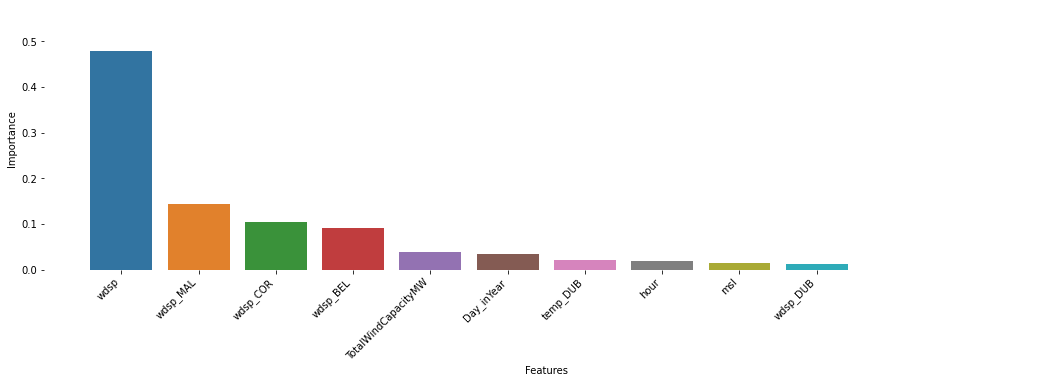

In [553]:
X_cols = X_valid.columns

rfc_fi = pd.DataFrame({'cols':X_cols, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=False)

f, ax = plt.subplots(figsize=(18, 5))

chart = sns.barplot(x="cols", y="imp", data=(rfc_fi.loc[rfc_fi.imp > 0.01]))

# Add a legend and informative axis label
ax.set(xlim=(-1, 12), ylabel="Importance",
       xlabel="Features")
sns.despine(left=True, bottom=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

# Met Éireann Weather Forecast API
Published by: Met Éireann
 32 
Licensed under: Met Eireann Custom Open Data Licence
https://data.gov.ie/dataset/met-eireann-weather-forecast-api/resource/027da6d5-d819-48d1-9b16-331dba169bd1

In [554]:

from xml.dom.minidom import parse
import xml.dom.minidom


In [555]:
def getWeather(lat, long, name):

    url = "http://metwdb-openaccess.ichec.ie/metno-wdb2ts/locationforecast?lat={};long={}".format(lat, long)
    s = requests.get(url).content

    DOMTree = xml.dom.minidom.parse(io.StringIO(s.decode('utf-8')))

    collection = DOMTree.documentElement
    if collection.hasAttribute("shelf"):
       print ("Root element : ", collection.getAttribute("shelf"))

    # Get all the movies in the collection
    product = collection.getElementsByTagName("product")

    df_cols = ['date', 'wddir', 'wdsp', 'temp', 'msl']
    rows = []

    product = collection.getElementsByTagName("product")
    timefcs = collection.getElementsByTagName("time")


    # Print detail of each movie.
    for timefc in timefcs:
        if timefc.hasAttribute("from"):
            fromtime =""
            wdeg = None
            wsp = None
            temp = None
            msl = None

            #print ("from: ", timefc.getAttribute("from"))
            fromtime = timefc.getAttribute("from")

            location = timefc.getElementsByTagName('location')[0]

            if (len(location.getElementsByTagName('windDirection')) > 0 ):
                wd = location.getElementsByTagName('windDirection')[0]
                if wd.hasAttribute("deg"):
                    wdeg = float(wd.getAttribute("deg"))
                    #print ("Wi)nd Direction deg: ", wd.getAttribute("deg"))    

            if (len(location.getElementsByTagName('windSpeed')) > 0):
                wsp = location.getElementsByTagName('windSpeed')[0]
                if wsp.hasAttribute("mps"):
                    wsp = float(wsp.getAttribute("mps"))

            if (len(location.getElementsByTagName('pressure')) > 0):
                msl = location.getElementsByTagName('pressure')[0]
                if msl.hasAttribute("value"):
                    msl = float(msl.getAttribute("value"))

            if (len(location.getElementsByTagName('temperature')) > 0):
                temp = location.getElementsByTagName('temperature')[0]
                if temp.hasAttribute("value"):
                    temp = float(temp.getAttribute("value"))
        #print ("From: " + fromtime + " Wind Direction deg: " + str(wdeg) + " Wind Speed mps: " + str(wsp))    
        if (wdeg != None):
            rows.append({"date": fromtime, "wddir": wdeg, "wdsp": wsp, "temp": temp, "msl": msl})


    # <windDirection id="dd" deg="348.0" name="N"/>
    # <windSpeed id="ff" mps="3.2" beaufort="2" name="Svak vind"/>


    out_df = pd.DataFrame(rows, columns = df_cols)
    
    out_df["date"] = pd.to_datetime(out_df["date"], infer_datetime_format=True, errors='ignore')

    #out_df.to_csv(name + "weather.csv")

    return out_df

In [556]:
# Belmullet: 54.225, -9.991
lat=54.225
long=-9.991

BELMULLETds = getWeather(lat, long, "Belmullet")

In [557]:
# Cork Airport: 51.8382 Longitude: -8.4880
lat= 51.8382
long= -8.4880

corkairportds = getWeather(lat, long, "Cork")

In [558]:
# Shannon Airport, Ireland. Latitude: 52.7012 Longitude: -8.9215.
lat= 52.7012
long= -8.9215

shannonairportds = getWeather(lat, long, "Shannon")

In [559]:
# Dublin Airport in Ireland. Latitude: 53.4264 Longitude: -6.2499
lat= 53.4264
long= -6.2499

dublinairportds = getWeather(lat, long, "Dublin")

In [560]:
# Malin Head:  55.3833318 -7.3666652
lat=55.3833318
long=-7.3666652

MALds = getWeather(lat, long, "Malin Head")

In [561]:
left = BELMULLETds.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

wfds = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonairportds.set_index(['date'])
wfds = wfds.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
wfds = wfds.join(right, lsuffix="", rsuffix="_COR")

right = MALds.set_index(['date'])
wfds = wfds.join(right, lsuffix="", rsuffix="_MAL")

wfds = wfds.reset_index()


In [562]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Met Station"))


fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_BEL'],
                    mode='lines',
                    name='Belmullet Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_COR'],
                    mode='lines',
                    name='Cork Airport Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp'],
                    mode='lines',
                    name='Shannon Airport Wind Speed',showlegend=True), 1, 1, secondary_y=False)
fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_DUB'],
                    mode='lines',
                    name='Dublin Airport Wind Speed',showlegend=True), 1, 1, secondary_y=False)
fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_MAL'],
                    mode='lines',
                    name='Malin head Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.update_layout(
    title_text="Wind speed ",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=1400,
    height=500
)
fig.show()

In [563]:
# Weather Hourly data wind speed in knt, for some reason, 1 knt = 0.514 m/s
knot = 0.514
wfds.wdsp_BEL = wfds.wdsp_BEL / knot
wfds.wdsp = wfds.wdsp / knot
wfds.wdsp_COR = wfds.wdsp_COR / knot
wfds.wdsp_DUB = wfds.wdsp_DUB / knot
wfds.wdsp_MAL = wfds.wdsp_MAL / knot

In [564]:
fig = go.Figure()
fig.add_trace(go.Box(y=newdf['wdsp_BEL'], name='BEL'))
fig.add_trace(go.Box(y=wfds['wdsp_BEL'], name='BEL forecast'))
fig.add_trace(go.Box(y=newdf['wdsp_DUB'], name = 'DUB'))
fig.add_trace(go.Box(y=wfds['wdsp_DUB'], name='DUB forecast'))
fig.add_trace(go.Box(y=newdf['wdsp'], name = 'SHA'))
fig.add_trace(go.Box(y=wfds['wdsp'], name='SHA forecast'))

fig.add_trace(go.Box(y=newdf['wdsp_COR'], name = 'CORK'))
fig.add_trace(go.Box(y=wfds['wdsp_COR'], name='CORK forecast'))

fig.add_trace(go.Box(y=newdf['wdsp_MAL'], name = 'MALIN Head'))
fig.add_trace(go.Box(y=wfds['wdsp_MAL'], name='Malin forecast'))
fig.show()

# Run predictions 

In [565]:
wfds.columns

Index(['date', 'wddir_BEL', 'wdsp_BEL', 'temp_BEL', 'msl_BEL', 'wddir_DUB',
       'wdsp_DUB', 'temp_DUB', 'msl_DUB', 'wddir', 'wdsp', 'temp', 'msl',
       'wddir_COR', 'wdsp_COR', 'temp_COR', 'msl_COR', 'wddir_MAL', 'wdsp_MAL',
       'temp_MAL', 'msl_MAL'],
      dtype='object')

In [566]:
X_train.columns

Index(['hour', 'Day_inYear', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
       'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'wdsp_MAL', 'wddir_MAL', 'TotalWindCapacityMW'],
      dtype='object')

In [567]:
wfds["hour"] = 0
wfds["isweekday"] = False
wfds["month"] = 0
wfds['year'] = 0
wfds["day"] = 0
wfds['TotalWindCapacityMW'] = latestWindCapacityMW
def settimeattfull(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6) 
    row["month"] = row.date.month
    row["year"] = row.date.year
    row["day"] = row.date.day
    return row

wfds = wfds.apply(settimeattfull, axis='columns')

In [568]:
wfds = transformTimeInto2d(wfds)
wfds.columns

Index(['date', 'wddir_BEL', 'wdsp_BEL', 'temp_BEL', 'msl_BEL', 'wddir_DUB',
       'wdsp_DUB', 'temp_DUB', 'msl_DUB', 'wddir', 'wdsp', 'temp', 'msl',
       'wddir_COR', 'wdsp_COR', 'temp_COR', 'msl_COR', 'wddir_MAL', 'wdsp_MAL',
       'temp_MAL', 'msl_MAL', 'hour', 'isweekday', 'month', 'year', 'day',
       'TotalWindCapacityMW', 'Day_inYear', 'daysInYear', 'radianTime',
       'radianTimeCos', 'radianTimeSin', 'hourCos', 'hourSin'],
      dtype='object')

In [569]:
wfds = transformWindInto2d(wfds)
wfds.columns

Index(['date', 'wddir_BEL', 'wdsp_BEL', 'temp_BEL', 'msl_BEL', 'wddir_DUB',
       'wdsp_DUB', 'temp_DUB', 'msl_DUB', 'wddir', 'wdsp', 'temp', 'msl',
       'wddir_COR', 'wdsp_COR', 'temp_COR', 'msl_COR', 'wddir_MAL', 'wdsp_MAL',
       'temp_MAL', 'msl_MAL', 'hour', 'isweekday', 'month', 'year', 'day',
       'TotalWindCapacityMW', 'Day_inYear', 'daysInYear', 'radianTime',
       'radianTimeCos', 'radianTimeSin', 'hourCos', 'hourSin', 'wind_CORsin',
       'wind_CORcos', 'wind_DUBsin', 'wind_DUBcos', 'wind_BELsin',
       'wind_BELcos', 'windsin', 'windcos', 'wind_MALsin', 'wind_MALcos'],
      dtype='object')

In [570]:
redtds = wfds.loc[ : , attrSet]


In [571]:
redtds

hour  Day_inYear  wdsp_BEL  ...  wdsp_MAL  wddir_MAL  TotalWindCapacityMW
0      23         102  1.361868  ...  5.058366      159.3             5531.095
1       0         103  2.140078  ...  5.642023      169.8             5531.095
2       1         103  2.723735  ...  5.447471      165.8             5531.095
3       2         103  1.750973  ...  6.031128      161.5             5531.095
4       3         103  2.140078  ...  5.642023      168.7             5531.095
..    ...         ...       ...  ...       ...        ...                  ...
109    12         111  3.891051  ...  4.863813       50.6             5531.095
110    18         111  2.334630  ...  6.225681       63.3             5531.095
111     0         112  3.112840  ...  5.252918      218.8             5531.095
112     6         112  2.140078  ...  7.198444      223.9             5531.095
113    12         112  3.112840  ...  5.252918      297.0             5531.095

[114 rows x 15 columns]

In [572]:
redtds.columns

Index(['hour', 'Day_inYear', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
       'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'wdsp_MAL', 'wddir_MAL', 'TotalWindCapacityMW'],
      dtype='object')

In [573]:
X_valid.columns

Index(['hour', 'Day_inYear', 'wdsp_BEL', 'wddir_BEL', 'wdsp', 'wddir', 'msl',
       'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'wdsp_MAL', 'wddir_MAL', 'TotalWindCapacityMW'],
      dtype='object')

In [574]:
redtds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hour                 114 non-null    int64  
 1   Day_inYear           114 non-null    int64  
 2   wdsp_BEL             114 non-null    float64
 3   wddir_BEL            114 non-null    float64
 4   wdsp                 114 non-null    float64
 5   wddir                114 non-null    float64
 6   msl                  114 non-null    float64
 7   wdsp_COR             114 non-null    float64
 8   wddir_COR            114 non-null    float64
 9   wdsp_DUB             114 non-null    float64
 10  wddir_DUB            114 non-null    float64
 11  temp_DUB             114 non-null    float64
 12  wdsp_MAL             114 non-null    float64
 13  wddir_MAL            114 non-null    float64
 14  TotalWindCapacityMW  114 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 1

In [575]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 528 to 31463
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hour                 8760 non-null   float64
 1   Day_inYear           8760 non-null   int64  
 2   wdsp_BEL             8760 non-null   int64  
 3   wddir_BEL            8760 non-null   int64  
 4   wdsp                 8760 non-null   int64  
 5   wddir                8760 non-null   int64  
 6   msl                  8760 non-null   float64
 7   wdsp_COR             8760 non-null   int64  
 8   wddir_COR            8760 non-null   int64  
 9   wdsp_DUB             8760 non-null   int64  
 10  wddir_DUB            8760 non-null   int64  
 11  temp_DUB             8760 non-null   float64
 12  wdsp_MAL             8760 non-null   int64  
 13  wddir_MAL            8760 non-null   float64
 14  TotalWindCapacityMW  8760 non-null   float64
dtypes: float64(5), int64(10)
memory usa

In [576]:

# Preprocessing of validation data, get predictions
preds = clf.predict(redtds)

In [577]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Met Station"))


fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_BEL'],
                    mode='lines',
                    name='Belmullet Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=wfds['date'], y=preds,
                    mode='lines',
                    name='Wind Preds',showlegend=True), 1, 1, secondary_y=True)

fig.update_layout(
    title_text="Wind speed ",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=1400,
    height=500
)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

In [578]:
preds

array([ 338.24625,  312.06   ,  318.09875,  339.58375,  347.94125,
        339.27125,  312.57875,  262.195  ,  265.1625 ,  252.91625,
        161.355  ,  150.31   ,  187.26   ,  250.68375,  253.78   ,
        290.99375,  259.74   ,  239.3775 ,  265.585  ,  321.90875,
        250.96375,  294.95375,  296.9025 ,  300.76   ,  261.965  ,
        335.59625,  362.65   ,  293.7325 ,  288.3975 ,  277.9825 ,
        328.4525 ,  311.4325 ,  287.21375,  283.52125,  298.845  ,
        242.7425 ,  337.51625,  686.53375,  811.47125,  586.03625,
        614.4125 ,  677.825  ,  653.44   ,  574.1075 ,  439.85625,
        406.14375,  419.36   ,  529.97125,  439.49125,  605.94375,
        403.97125,  415.60125,  414.17   ,  408.14125,  418.9525 ,
        452.3025 ,  488.13125,  549.0825 ,  663.40625,  643.4    ,
        673.5825 ,  706.795  ,  885.265  ,  764.0875 ,  751.49625,
        742.03125,  804.97125,  806.7225 ,  807.17375, 1001.78375,
       1069.72375, 1126.51   , 1027.495  ,  997.3025 ,  937.65

In [579]:
forecast = wfds.copy()
#forecast['date'] = wfds['date']
forecast['RF_Preds']=preds

forecast.head(24)

date  wddir_BEL  ...  wind_MALcos   RF_Preds
0  2021-04-12 23:00:00      208.7  ...    -3.059526  338.24625
1  2021-04-13 00:00:00      145.0  ...     5.575255  312.06000
2  2021-04-13 01:00:00      197.4  ...    -4.150937  318.09875
3  2021-04-13 02:00:00      204.1  ...    -1.736295  339.58375
4  2021-04-13 03:00:00      130.6  ...     3.300185  347.94125
5  2021-04-13 04:00:00      165.7  ...     2.936357  339.27125
6  2021-04-13 05:00:00      181.8  ...    -5.924396  312.57875
7  2021-04-13 06:00:00      166.4  ...    -6.294500  262.19500
8  2021-04-13 07:00:00      222.3  ...    -5.232918  265.16250
9  2021-04-13 08:00:00      183.5  ...     8.606167  252.91625
10 2021-04-13 09:00:00      185.8  ...     1.832770  161.35500
11 2021-04-13 10:00:00      222.0  ...    -2.139601  150.31000
12 2021-04-13 11:00:00      256.3  ...     9.460607  187.26000
13 2021-04-13 12:00:00      294.6  ...    -5.904324  250.68375
14 2021-04-13 13:00:00      310.9  ...     8.115515  253.78000
15 2021-04-13 14:00:00      321.8  ...     4.498064  290.99375
16 2021-04-13 15:00:00      351.0  ...     4.736637  259.74000
17 2021-04-13 16:00:00      339.2  ...    -2.998078  239.37750
18 2021-04-13 17:00:00        0.8  ...     2.952774  265.58500
19 2021-04-13 18:00:00        8.5  ...     3.006461  321.90875
20 2021-04-13 19:00:00       15.1  ...    -4.145714  250.96375
21 2021-04-13 20:00:00       20.5  ...    -1.641926  294.95375
22 2021-04-13 21:00:00       29.3  ...     3.495612  296.90250
23 2021-04-13 22:00:00       30.4  ...    -1.738510  300.76000

[24 rows x 45 columns]

In [580]:
def getCurrentEirgridWindPrediction(): 
  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom='
  url_mid = '%2000:00&dateto='
  url_end = '%2023:59'

  now = datetime.now()
  yesterday = now - timedelta(days=1)
  tomorrow = now + timedelta(days=1)

  date_time = yesterday.strftime("%d-%b-%Y")
  tom_date_time = tomorrow.strftime("%d-%b-%Y") 
  #print("Date and Time:",date_time)
  url = url_base + date_time + url_mid + tom_date_time + url_end
  print(url)

  s = requests.get(url).content
  mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
  mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
  mds = mds.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
  mds = mds.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})
  mds.drop('DATE & TIME', axis=1, inplace=True)
  mds.drop(' REGION', axis=1, inplace=True)

  return mds


In [581]:
def getCurrentEirgridDemandPrediction(): 
  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom='
  url_mid = '%2000:00&dateto='
  url_end = '%2023:59'

  now = datetime.now()
  yesterday = now - timedelta(days=1)
  tomorrow = now + timedelta(days=1)

  date_time = yesterday.strftime("%d-%b-%Y")
  tom_date_time = tomorrow.strftime("%d-%b-%Y") 
  #print("Date and Time:",date_time)
  url = url_base + date_time + url_mid + tom_date_time + url_end
  print(url)

  s = requests.get(url).content
  mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
  mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')

  mds = mds.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
  mds = mds.rename(columns={' FORECAST DEMAND(MW)' : 'ForecastDemandMW'})
  mds.drop('DATE & TIME', axis=1, inplace=True)
  mds.drop(' REGION', axis=1, inplace=True)

  return mds


In [582]:
eds = getCurrentEirgridDemandPrediction()

left = forecast.set_index(['date'])
right = eds.set_index(['date'])
forecast = left.join(right)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=11-Apr-2021%2000:00&dateto=13-Apr-2021%2023:59


In [583]:
mds = getCurrentEirgridWindPrediction()

right = mds.set_index(['date'])
forecast = forecast.join(right)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=11-Apr-2021%2000:00&dateto=13-Apr-2021%2023:59


In [584]:
forecast

wddir_BEL  wdsp_BEL  ...  ForecastWndMW    ACTUAL WIND(MW)
date                                      ...                                  
2021-04-12 23:00:00      208.7  1.361868  ...          180.0               66.0
2021-04-13 00:00:00      145.0  2.140078  ...          161.0                NaN
2021-04-13 01:00:00      197.4  2.723735  ...          154.0                NaN
2021-04-13 02:00:00      204.1  1.750973  ...          145.0                NaN
2021-04-13 03:00:00      130.6  2.140078  ...          139.0                NaN
...                        ...       ...  ...            ...                ...
2021-04-21 12:00:00      235.0  3.891051  ...            NaN                NaN
2021-04-21 18:00:00      309.4  2.334630  ...            NaN                NaN
2021-04-22 00:00:00      104.1  3.112840  ...            NaN                NaN
2021-04-22 06:00:00       99.0  2.140078  ...            NaN                NaN
2021-04-22 12:00:00      301.0  3.112840  ...            NaN                NaN

[114 rows x 48 columns]

In [585]:
if not os.path.exists('forecast'):
  os.mkdir('forecast')

now = datetime.now()

forecast.to_csv("forecast/RF_forecast" + str(now) + ".csv")

In [586]:
datetime.now()

datetime.datetime(2021, 4, 12, 22, 5, 37, 449767)